##Outbreak Prediction of disease using Machine learning

This notebook contain prediction of covid 19 outbreak and detialed data analysis of outbreak and the objective of this project is to model the timeseries data of covid cases in India with most accureate machine learning models.

`Configuring necessay library `

In [ ]:
pip install prophet

ERROR: Operation cancelled by user


In [ ]:
pip install plotly

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from prophet import Prophet
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#from pyramid.arima import auto_arima

*Importing dataset*

In [ ]:
covid=pd.read_csv("/content/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
#Extracting India's data
covid_india=covid[covid['Country/Region']=="India"]

#Extracting other countries for comparison of worst affected countries
covid_spain=covid[covid['Country/Region']=="Spain"]
covid_us=covid[covid['Country/Region']=="US"]
covid_italy=covid[covid['Country/Region']=="Italy"]
covid_iran=covid[covid['Country/Region']=="Iran"]
covid_france=covid[covid['Country/Region']=="France"]
covid_uk=covid[covid['Country/Region']=="UK"]
covid_br=covid[covid['Country/Region']=="Brazil"]
covid_russia=covid[covid['Country/Region']=="Russia"]

#Extracting data of neighbouring countries
covid_pak=covid[covid['Country/Region']=="Pakistan"]
covid_china=covid[covid['Country/Region']=="Mainland China"]
covid_afg=covid[covid['Country/Region']=="Afghanistan"]
covid_nepal=covid[covid['Country/Region']=="Nepal"]
covid_bhutan=covid[covid['Country/Region']=="Bhutan"]
covid_lanka=covid[covid["Country/Region"]=="Sri Lanka"]
covid_ban=covid[covid["Country/Region"]=="Bangladesh"]

In [ ]:
#Converting the date into Datetime format
covid_india["ObservationDate"]=pd.to_datetime(covid_india["ObservationDate"])
covid_spain["ObservationDate"]=pd.to_datetime(covid_spain["ObservationDate"])
covid_us["ObservationDate"]=pd.to_datetime(covid_us["ObservationDate"])
covid_italy["ObservationDate"]=pd.to_datetime(covid_italy["ObservationDate"])
covid_iran["ObservationDate"]=pd.to_datetime(covid_iran["ObservationDate"])
covid_france["ObservationDate"]=pd.to_datetime(covid_france["ObservationDate"])
covid_uk["ObservationDate"]=pd.to_datetime(covid_uk["ObservationDate"])
covid_br["ObservationDate"]=pd.to_datetime(covid_br["ObservationDate"])
covid_russia["ObservationDate"]=pd.to_datetime(covid_russia["ObservationDate"])

covid_pak["ObservationDate"]=pd.to_datetime(covid_pak["ObservationDate"])
covid_china["ObservationDate"]=pd.to_datetime(covid_china["ObservationDate"])
covid_afg["ObservationDate"]=pd.to_datetime(covid_afg["ObservationDate"])
covid_nepal["ObservationDate"]=pd.to_datetime(covid_nepal["ObservationDate"])
covid_bhutan["ObservationDate"]=pd.to_datetime(covid_bhutan["ObservationDate"])
covid_lanka["ObservationDate"]=pd.to_datetime(covid_lanka["ObservationDate"])
covid_ban["ObservationDate"]=pd.to_datetime(covid_ban["ObservationDate"])

In [ ]:
#Grouping the data based on the Date
india_datewise=covid_india.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
spain_datewise=covid_spain.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
us_datewise=covid_us.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
italy_datewise=covid_italy.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
iran_datewise=covid_iran.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
france_datewise=covid_france.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
uk_datewise=covid_uk.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
brazil_datewise=covid_br.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
russia_datewise=covid_russia.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

pak_datewise=covid_pak.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
china_datewise=covid_china.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
afg_datewise=covid_afg.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
nepal_datewise=covid_nepal.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
bhutan_datewise=covid_bhutan.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
lanka_datewise=covid_lanka.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
ban_datewise=covid_ban.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
#Adding week column to perfom weekly analysis further ahead
india_datewise["WeekofYear"]=india_datewise.index.weekofyear
spain_datewise["WeekofYear"]=spain_datewise.index.weekofyear
us_datewise["WeekofYear"]=us_datewise.index.weekofyear
italy_datewise["WeekofYear"]=italy_datewise.index.weekofyear
iran_datewise["WeekofYear"]=iran_datewise.index.weekofyear
france_datewise["WeekofYear"]=france_datewise.index.weekofyear
uk_datewise["WeekofYear"]=uk_datewise.index.weekofyear
brazil_datewise["WeekofYear"]=brazil_datewise.index.weekofyear
russia_datewise["WeekofYear"]=russia_datewise.index.weekofyear

pak_datewise["WeekofYear"]=pak_datewise.index.weekofyear
china_datewise["WeekofYear"]=china_datewise.index.weekofyear
afg_datewise["WeekofYear"]=afg_datewise.index.weekofyear
nepal_datewise["WeekofYear"]=nepal_datewise.index.weekofyear
bhutan_datewise["WeekofYear"]=bhutan_datewise.index.weekofyear
lanka_datewise["WeekofYear"]=lanka_datewise.index.weekofyear
ban_datewise["WeekofYear"]=ban_datewise.index.weekofyear

AttributeError: 'DatetimeIndex' object has no attribute 'weekofyear'

In [ ]:
india_datewise["Days Since"]=(india_datewise.index-india_datewise.index[0])
india_datewise["Days Since"]=india_datewise["Days Since"].dt.days

In [ ]:
No_Lockdown=covid_india[covid_india["ObservationDate"]<pd.to_datetime("2020-03-21")]
Lockdown_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-03-21"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-04-15"))]
Lockdown_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-04-15"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-04"))]
Lockdown_3=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-04"))&(covid_india["ObservationDate"]<pd.to_datetime("2020-05-19"))]
Lockdown_4=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-05-19"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-05-31"))]
Unlock_1=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-06-01"))&(covid_india["ObservationDate"]<=pd.to_datetime("2020-06-30"))]
Unlock_2=covid_india[(covid_india["ObservationDate"]>=pd.to_datetime("2020-07-01"))]

No_Lockdown_datewise=No_Lockdown.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_1_datewise=Lockdown_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_2_datewise=Lockdown_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_3_datewise=Lockdown_3.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Lockdown_4_datewise=Lockdown_4.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_1_datewise=Unlock_1.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
Unlock_2_datewise=Unlock_2.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [ ]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

**EDA on india dataset**

In [ ]:
print("Number of Confirmed Cases",india_datewise["Confirmed"].iloc[-1])
print("Number of Recovered Cases",india_datewise["Recovered"].iloc[-1])
print("Number of Death Cases",india_datewise["Deaths"].iloc[-1])
print("Number of Active Cases",india_datewise["Confirmed"].iloc[-1]-india_datewise["Recovered"].iloc[-1]-india_datewise["Deaths"].iloc[-1])
print("Number of Closed Cases",india_datewise["Recovered"].iloc[-1]+india_datewise["Deaths"].iloc[-1])
print("Approximate Number of Confirmed Cases per day",round(india_datewise["Confirmed"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Recovered Cases per day",round(india_datewise["Recovered"].iloc[-1]/india_datewise.shape[0]))
print("Approximate Number of Death Cases per day",round(india_datewise["Deaths"].iloc[-1]/india_datewise.shape[0]))
print("Number of New Cofirmed Cases in last 24 hours are",india_datewise["Confirmed"].iloc[-1]-india_datewise["Confirmed"].iloc[-2])
print("Number of New Recoverd Cases in last 24 hours are",india_datewise["Recovered"].iloc[-1]-india_datewise["Recovered"].iloc[-2])
print("Number of New Death Cases in last 24 hours are",india_datewise["Deaths"].iloc[-1]-india_datewise["Deaths"].iloc[-2])

Number of Confirmed Cases 173491.0
Number of Recovered Cases 82627.0
Number of Death Cases 4980.0
Number of Active Cases 85884.0
Number of Closed Cases 87607.0
Approximate Number of Confirmed Cases per day 1434
Approximate Number of Recovered Cases per day 683
Approximate Number of Death Cases per day 41
Number of New Cofirmed Cases in last 24 hours are 8105.0
Number of New Recoverd Cases in last 24 hours are 11707.0
Number of New Death Cases in last 24 hours are 269.0


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming india_datewise.index is a DateTimeIndex
# Get the start date from the index
start_date = india_datewise.index[0]

# Create a new index starting from March and with 3-month gaps
new_index = pd.date_range(start=start_date, periods=12, freq='3M')

# Your existing code
fig = px.bar(x=india_datewise.index, y=india_datewise["Confirmed"] - india_datewise["Recovered"] - india_datewise["Deaths"])
fig.update_layout(
    title="Distribution of Number of Active Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    xaxis=dict(
        title=dict(font=dict(color='black', size=18)),
        tickvals=new_index  # Set tick values to every 3rd month
    ),
    yaxis=dict(title=dict(font=dict(color='black', size=18)), tickvals=list(range(0, int(max(india_datewise["Confirmed"])), 20000)))
)
fig.show()


In [ ]:
import plotly.express as px

# Your existing code
fig = px.bar(x=india_datewise.index, y=india_datewise["Confirmed"] - india_datewise["Recovered"] - india_datewise["Deaths"])
fig.update_layout(
    title="Distribution of Number of Active Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    xaxis=dict(title=dict(font=dict(color='black', size=20, weight='bold'))),
    yaxis=dict(title=dict(font=dict(color='black', size=20, weight='bold')))
)
fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.layout.xaxis.title.Font: 'weight'

Did you mean "size"?

    Valid properties:
        color

        family
            HTML font family - the typeface that will be applied by
            the web browser. The web browser will only be able to
            apply a font if it is available on the system which it
            operates. Provide multiple font families, separated by
            commas, to indicate the preference in which to apply
            fonts if they aren't available on the system. The Chart
            Studio Cloud (at https://chart-studio.plotly.com or on-
            premise) generates images on a server, where only a
            select number of fonts are installed and supported.
            These include "Arial", "Balto", "Courier New", "Droid
            Sans",, "Droid Serif", "Droid Sans Mono", "Gravitas
            One", "Old Standard TT", "Open Sans", "Overpass", "PT
            Sans Narrow", "Raleway", "Times New Roman".
        size

        
Did you mean "size"?

Bad property path:
weight
^^^^^^

In [ ]:
import plotly.express as px

# Your existing code
fig = px.bar(x=india_datewise.index, y=india_datewise["Confirmed"] - india_datewise["Recovered"] - india_datewise["Deaths"])
fig.update_layout(
    title="Distribution of Number of Active Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    xaxis=dict(title=dict(font=dict(color='black', size=18))),
    yaxis=dict(title=dict(font=dict(color='black', size=18)))
)
fig.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming india_datewise.index is a DateTimeIndex
# Resample the index to have every 3rd month
new_index = india_datewise.index.to_series().resample('3M').min()

# Your existing code
fig = px.bar(x=india_datewise.index, y=india_datewise["Confirmed"] - india_datewise["Recovered"] - india_datewise["Deaths"])
fig.update_layout(
    title="Distribution of Number of Active Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    xaxis=dict(
        title=dict(font=dict(color='black', size=18)),
        tickvals=new_index  # Set tick values to every 3rd month
    ),
    yaxis=dict(title=dict(font=dict(color='black', size=18)), tickvals=list(range(0, int(max(india_datewise["Confirmed"])), 20000)))
)
fig.show()




In [ ]:
import plotly.express as px

# Your existing code
fig = px.bar(x=india_datewise.index, y=india_datewise["Confirmed"] - india_datewise["Recovered"] - india_datewise["Deaths"])
fig.update_layout(
    title="Distribution of Number of Active Cases",
    xaxis_title="Date",
    yaxis_title="Number of Cases",
    xaxis=dict(title=dict(font=dict(size=16))),
    yaxis=dict(title=dict(font=dict(size=16)))
)
fig.show()


In [ ]:
fig=px.bar(x=india_datewise.index,y=india_datewise["Recovered"]+india_datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

*Growth Rate of Confirmed, Recoverd and Death Cases*

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

*Recovery and mortility rate*

**Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100**

**Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100**


Recovery Rate was initially very high when the number of positive (Confirmed) cases were low and showed a drastic drop with increasing number of cases. Increasing Mortality rate and dropped Recovery Rate is worrying sign for India.

Increasing Mortality Rate and very slowly increasing Recovery Rate is conclusive evidence for increase in number of Closed Cases

Recovery Rate is showing an upward trend which is a really good sign. Mortality Rate is showing a slight dips but with occasional upward trends.

In [ ]:
print('Mean Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).mean())
print('Mean Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).mean())
print('Median Recovery Rate: ',((india_datewise["Recovered"]/india_datewise["Confirmed"])*100).median())
print('Median Mortality Rate: ',((india_datewise["Deaths"]/india_datewise["Confirmed"])*100).median())

fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]/india_datewise["Confirmed"])*100,
              name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=india_datewise.index, y=(india_datewise["Deaths"]/india_datewise["Confirmed"])*100,
              name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Mean Recovery Rate:  30.759360531681832
Mean Mortality Rate:  2.0456830553434537
Median Recovery Rate:  23.81089188514096
Median Mortality Rate:  2.8117526401862327


##Growth Factor for different types of Cases¶


Growth Factor for different types of Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

A growth factor above 1 indicates an increase correspoding cases.

A growth factor above 1 but trending downward is a positive sign, whereas a growth factor constantly above 1 is the sign of exponential growth.

A growth factor constant at 1 indicates there is no change in any kind of cases.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"]/india_datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"]/india_datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"]/india_datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Growth Factor for Active and Closed Cases¶


Growth Factor of Recoverd Cases is constantly very close to 1 indicating the Recovery Rate very low which was high intially as discussed earlier, with Growth Factor of Confirmed and Death Cases well above 1 is an indication of considerable growth in both types of Cases.

Growth Factor for Active and Closed Cases
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Active and Closed Cases) / new (Active and Closed Cases) on the previous day.

**A growth factor above 1 indicates an increase correspoding cases**.

**A growth factor above 1 but trending downward is a positive sign.**

**A growth factor constant at 1 indicates there is no change in any kind of cases.**

A growth factor below 1 indicates real positive sign implying more patients are getting recovered or dying as compared to the Confirmed Cases.

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index,
                        y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"])/(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"])/(india_datewise["Recovered"]+india_datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed cases in India",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Recovered"].diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Deaths"].diff().rolling(window=7).mean().diff(),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="7 Days Rolling mean of Confirmed, Recovered and Death Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Confirmed"]-india_datewise["Recovered"]-india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Active Cases'))
fig.add_trace(go.Scatter(x=india_datewise.index, y=(india_datewise["Recovered"]+india_datewise["Deaths"]).diff().rolling(window=7).mean(),
                    mode='lines+markers',
                    name='Closed Cases'))
fig.update_layout(title="7 Days Rolling mean of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(india_datewise["WeekofYear"].unique()):
    india_weekwise_confirmed.append(india_datewise[india_datewise["WeekofYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(india_datewise[india_datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(india_datewise[india_datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num_india, y=india_weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
print("Average weekly increase in number of Confirmed Cases",round(pd.Series(india_weekwise_confirmed).diff().fillna(0).mean()))
print("Average weekly increase in number of Recovered Cases",round(pd.Series(india_weekwise_recovered).diff().fillna(0).mean()))
print("Average weekly increase in number of Death Cases",round(pd.Series(india_weekwise_deaths).diff().fillna(0).mean()))

fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_confirmed).diff().fillna(0),
          name="Weekly rise in number of Confirmed Cases"),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=week_num_india, y=pd.Series(india_weekwise_deaths).diff().fillna(0),
          name="Weekly rise in number of Death Cases"),
    row=1, col=2
)
fig.update_layout(title="India's Weekly increas in Number of Confirmed and Death Cases",
    font=dict(
        size=10,
    )
)
fig.update_layout(width=900,legend=dict(x=0,y=-0.5,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Number of Cases", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Number of Cases", row=1, col=2)
fig.show()

Average weekly increase in number of Confirmed Cases 18188
Average weekly increase in number of Recovered Cases 9835
Average weekly increase in number of Death Cases 591


**Week 33rd is currently going o**n.

Confirmed Cases are showing upward trend every week, recording highest number of Confirmed cases in 28th week (400k+ Confirmed Cases).

Death cases showed a very slight dip in 16th week. The 22nd week recorded less number of deaths against the trend which is a good sign. 23rd week showed an increase number of deaths yet again and the same trend is being followed in weeks ahead.

Infection and Death rate both are high and showing upward trend every week continuously

In [ ]:
cases=65
double_days=[]
C=[]
while(1):
    double_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C.append(cases)
    cases=cases*2
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break

cases=65
tipling_days=[]
C1=[]
while(1):
    tipling_days.append(int(india_datewise[india_datewise["Confirmed"]<=cases].iloc[[-1]]["Days Since"]))
    C1.append(cases)
    cases=cases*3
    if(cases<india_datewise["Confirmed"].max()):
        continue
    else:
        break

india_doubling=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first case"])
india_doubling["Number of days required to Double the cases"]=india_doubling["Days since first case"].diff().fillna(india_doubling["Days since first case"].iloc[0])

india_tripling=pd.DataFrame(list(zip(C1,tipling_days)),columns=["No. of cases","Days since first case"])
india_tripling["Number of days required to Triple the cases"]=india_tripling["Days since first case"].diff().fillna(india_tripling["Days since first case"].iloc[0])

india_doubling.style.background_gradient(cmap='Reds')

,No. of cases,Days since first case,Number of days required to Double the cases
0,65,41,41.000000
1,130,46,5.000000
2,260,50,4.000000
3,520,53,3.000000
4,1040,59,6.000000
5,2080,62,3.000000
6,4160,66,4.000000
7,8320,71,5.000000
8,16640,79,8.000000
9,33280,90,11.000000


In [ ]:
india_tripling.style.background_gradient(cmap='Reds')


,No. of cases,Days since first case,Number of days required to Triple the cases
0,65,41,41.000000
1,195,49,8.000000
2,585,54,5.000000
3,1755,61,7.000000
4,5265,67,6.000000
5,15795,79,12.000000
6,47385,95,16.000000
7,142155,115,20.000000


***Machine learning Prediction models ***

In [ ]:
linear regression model

SyntaxError: invalid syntax (<ipython-input-28-74458deba7b8>, line 1)

In [ ]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
model_scores=[]

In [ ]:
poly = PolynomialFeatures(degree = 6)

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [ ]:
linreg=LinearRegression()
linreg.fit(train_poly,y)

LinearRegression()

In [ ]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  8587.763974438445


In [ ]:
comp_data=poly.fit_transform(np.array(india_datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [ ]:
new_date=[]
new_prediction_poly=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_date_poly=poly.fit_transform(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

In [ ]:
model_predictions=pd.DataFrame(zip(new_date,new_prediction_poly),columns=["Date","Polynomial Regression Prediction"])
model_predictions.head()

,Date,Polynomial Regression Prediction
0,2020-06-20,409891.415369
1,2020-06-21,423860.611388
2,2020-06-22,438111.951457
3,2020-06-23,452643.678517
4,2020-06-24,467453.676985


**Support Vector Machine Regressor**

In [ ]:
train_ml=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid_ml=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]

In [ ]:
svm=SVR(C=0.01,degree=7,kernel='poly')

In [ ]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),train_ml["Confirmed"])

SVR(C=0.01, degree=7, kernel='poly')

In [ ]:
prediction_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
rmse_svm=np.sqrt(mean_squared_error(prediction_svm,valid_ml["Confirmed"]))
model_scores.append(rmse_svm)
print("Root Mean Square Error for SVR Model: ",rmse_svm)

Root Mean Square Error for SVR Model:  93547.04403733215


In [ ]:
plt.figure(figsize=(11,6))
predictions=svm.predict(np.array(india_datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=india_datewise.index, y=india_datewise["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=india_datewise.index, y=predictions,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 1100x600 with 0 Axes>

In [ ]:
new_date=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(india_datewise.index[-1]+timedelta(days=i))
    new_prediction_svm.append(svm.predict(np.array(india_datewise["Days Since"].max()+i).reshape(-1,1))[0])


In [ ]:
model_predictions["SVM Prediction"]=new_prediction_svm
model_predictions.head()


,Date,Polynomial Regression Prediction,SVM Prediction
0,2020-06-20,409891.415369,542193.297007
1,2020-06-21,423860.611388,569492.327479
2,2020-06-22,438111.951457,597961.121642
3,2020-06-23,452643.678517,627641.155013
4,2020-06-24,467453.676985,658575.071316




```
# This is formatted as code
```

**Time Series Forecasting**

In [ ]:
model_train=india_datewise.iloc[:int(india_datewise.shape[0]*0.95)]
valid=india_datewise.iloc[int(india_datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [ ]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=1.2)


/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: EstimationWarning:

Model has no free parameters to estimate. Set optimized=False to suppress this warning



In [ ]:
y_pred["Holt"]=holt.forecast(len(valid))
rmse_holt_linear=np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))
model_scores.append(rmse_holt_linear)
print("Root Mean Square Error Holt's Linear Model: ",rmse_holt_linear)

Root Mean Square Error Holt's Linear Model:  15400.430629344964


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Confirmed"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Confirmed"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Holt"],
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
holt_new_prediction=[]
for i in range(1,18):
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-06-20,409891.415369,542193.297007,373305.832366
1,2020-06-21,423860.611388,569492.327479,382316.938176
2,2020-06-22,438111.951457,597961.121642,391328.043987
3,2020-06-23,452643.678517,627641.155013,400339.149797
4,2020-06-24,467453.676985,658575.071316,409350.255607


**Facebook's Prophet Model**

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(india_datewise.index),list(india_datewise["Confirmed"])),columns=['ds','y'])


In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x05qpxw/esxdycd2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x05qpxw/e5d1wfeh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43653', 'data', 'file=/tmp/tmp7x05qpxw/esxdycd2.json', 'init=/tmp/tmp7x05qpxw/e5d1wfeh.json', 'output', 'file=/tmp/tmp7x05qpxw/prophet_modelkepeujzo/prophet_model-20240226184023.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:40:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:40:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
rmse_prophet=np.sqrt(mean_squared_error(india_datewise["Confirmed"],confirmed_forecast['yhat'].head(india_datewise.shape[0])))
model_scores.append(rmse_prophet)
print("Root Mean Squared Error for Prophet Model: ",rmse_prophet)

Root Mean Squared Error for Prophet Model:  3956.0985879198633


Figure(1000x600)


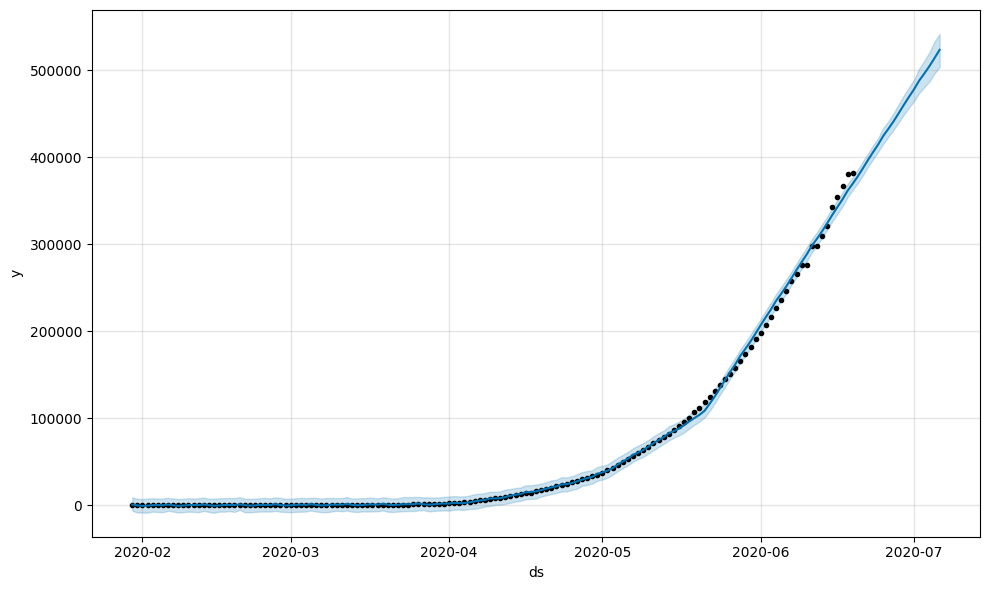

In [ ]:
print(prophet_c.plot(confirmed_forecast))

Figure(900x600)


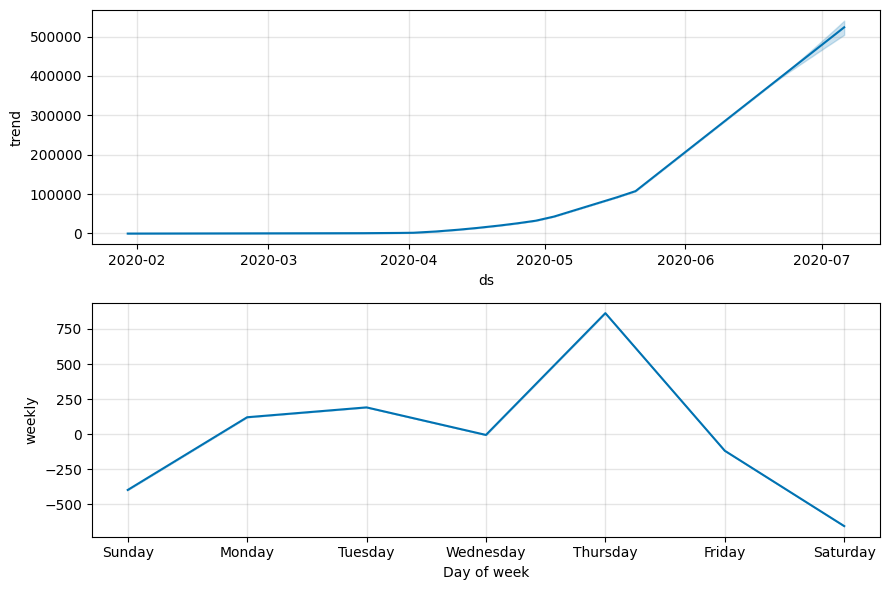

In [ ]:
print(prophet_c.plot_components(confirmed_forecast))

In [ ]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-06-20,409891.415369,542193.297007,373305.832366,378152.850863,386060.840784
1,2020-06-21,423860.611388,569492.327479,382316.938176,387453.215225,395511.509519
2,2020-06-22,438111.951457,597961.121642,391328.043987,397014.469171,404275.622383
3,2020-06-23,452643.678517,627641.155013,400339.149797,406127.781565,414117.672122
4,2020-06-24,467453.676985,658575.071316,409350.255607,414974.623237,422475.570376


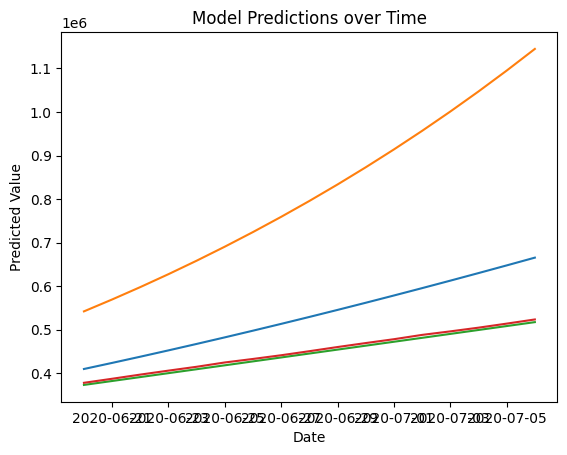

In [ ]:
# @title Model Predictions over Time

import matplotlib.pyplot as plt
sns.lineplot(x="Date", y="Polynomial Regression Prediction", data=model_predictions)
sns.lineplot(x="Date", y="SVM Prediction", data=model_predictions)
sns.lineplot(x="Date", y="Holt's Linear Model Prediction", data=model_predictions)
sns.lineplot(x="Date", y="Prophet's Prediction", data=model_predictions)
plt.xlabel("Date")
plt.ylabel("Predicted Value")
_ = plt.title("Model Predictions over Time")

In [ ]:
models=["Polynomial Regression","Support Vector Machine Regresssor","Holt's Linear Model",
      "Facebook's Prophet Model"]

In [ ]:
model_evaluation=pd.DataFrame(list(zip(models,model_scores)),columns=["Model Name","Root Mean Squared Error"])
model_evaluation=model_evaluation.sort_values(["Root Mean Squared Error"])
model_evaluation.style.background_gradient(cmap='Reds')

,Model Name,Root Mean Squared Error
3,Facebook's Prophet Model,3956.098588
0,Polynomial Regression,8587.763974
2,Holt's Linear Model,15400.430629
1,Support Vector Machine Regresssor,93547.044037


In [ ]:
# prompt: calculate percentage of accuracy of all the model we performed above

def calculate_accuracy(model_predictions, actual_values):
  """
  Calculates the accuracy of a model by comparing its predictions to the actual values.

  Args:
    model_predictions: A list of predictions made by the model.
    actual_values: A list of the actual values.

  Returns:
    The accuracy of the model as a percentage.
  """

  # Calculate the absolute difference between the predictions and the actual values.
  absolute_differences = [abs(prediction - actual) for prediction, actual in zip(model_predictions, actual_values)]

  # Calculate the average absolute difference.
  average_absolute_difference = sum(absolute_differences) / len(absolute_differences)

  # Calculate the accuracy as a percentage.
  accuracy = 100 - (average_absolute_difference / sum(actual_values)) * 100

  return accuracy

# Calculate the accuracy of each model.
polynomial_regression_accuracy = calculate_accuracy(model_predictions["Polynomial Regression Prediction"], india_datewise["Confirmed"])
svm_accuracy = calculate_accuracy(model_predictions["SVM Prediction"], india_datewise["Confirmed"])
holt_linear_model_accuracy = calculate_accuracy(model_predictions["Holt's Linear Model Prediction"], india_datewise["Confirmed"])
prophet_accuracy = calculate_accuracy(model_predictions["Prophet's Prediction"], india_datewise["Confirmed"])

# Print the accuracy of each model.
print("Polynomial Regression Accuracy:", polynomial_regression_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Holt Linear Model Accuracy:", holt_linear_model_accuracy)
print("Prophet Accuracy:", prophet_accuracy)


NameError: name 'model_predictions' is not defined

In [ ]:
model_predictions["Average of Predictions Models"]=model_predictions.mean(axis=1)
show_predictions=model_predictions.head()
show_predictions

,Date,Polynomial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Prophet's Prediction,Prophet's Upper Bound,Average of Predictions Models
0,2020-06-20,409891.415369,542193.297007,373305.832366,378152.850863,386060.840784,417920.847278
1,2020-06-21,423860.611388,569492.327479,382316.938176,387453.215225,395511.509519,431726.920358
2,2020-06-22,438111.951457,597961.121642,391328.043987,397014.469171,404275.622383,445738.241728
3,2020-06-23,452643.678517,627641.155013,400339.149797,406127.781565,414117.672122,460173.887403
4,2020-06-24,467453.676985,658575.071316,409350.255607,414974.623237,422475.570376,474565.839504
